<a href="https://colab.research.google.com/github/gayecolakoglu/DiabeticRetinopathyDetection/blob/main/CLAHE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
import cv2
import glob
import imageio
import numpy as np
from tqdm import tqdm
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
import pathlib
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Packages used
import os
import glob
import shutil
import random
import pandas as pd
from PIL import Image
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

In [ ]:
import os
import sys
import random
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

import tensorflow as tf
from keras.preprocessing import image

In [ ]:
import cv2
import os

In [ ]:


folders=["/content/gdrive/MyDrive/KaggleImageData/allData/class_0/","/content/gdrive/MyDrive/KaggleImageData/allData/class_1/","/content/gdrive/MyDrive/KaggleImageData/allData/class_2/","/content/gdrive/MyDrive/KaggleImageData/allData/class_3/"]
#folders=["/content/gdrive/MyDrive/KaggleImageData/allData/class_4/"]

for folder in folders:  
  for filename in os.listdir(folder):
      print(filename)
      img = cv2.imread(os.path.join(folder,filename))
      img = cv2.resize(img,(224,224),3) # resize
      lab_image = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
      l,a,b = cv2.split(lab_image)
      equ = cv2.equalizeHist(l)
      updated_lab_img = cv2.merge((equ,a,b))
      hist_eq_img = cv2.cvtColor(updated_lab_img,cv2.COLOR_LAB2BGR)
      ###########CLAHE#########################
      #Apply CLAHE to L channel
      clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
      clahe_img = clahe.apply(l)
      #plt.hist(clahe_img.flat, bins=100, range=(0,255))

      #Combine the CLAHE enhanced L-channel back with A and B channels
      updated_lab_img2 = cv2.merge((clahe_img,a,b))

      #Convert LAB image back to color (RGB)
      CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2BGR)
      if folder=="/content/gdrive/MyDrive/KaggleImageData/allData/class_1/":
        cv2.imwrite('/content/gdrive/MyDrive/KaggleImageData/UfukHocaVeri/CLAHE/1/'+filename+'.jpeg',CLAHE_img)
      elif folder=="/content/gdrive/MyDrive/KaggleImageData/allData/class_2/":
        cv2.imwrite('/content/gdrive/MyDrive/KaggleImageData/UfukHocaVeri/CLAHE/2/'+filename+'.jpeg',CLAHE_img)
      elif folder=="/content/gdrive/MyDrive/KaggleImageData/allData/class_3/":
        cv2.imwrite('/content/gdrive/MyDrive/KaggleImageData/UfukHocaVeri/CLAHE/3/'+filename+'.jpeg',CLAHE_img)
      elif folder=="/content/gdrive/MyDrive/KaggleImageData/allData/class_4/":
        cv2.imwrite('/content/gdrive/MyDrive/KaggleImageData/UfukHocaVeri/CLAHE/4/'+filename+'.jpeg',CLAHE_img)
      elif folder=="/content/gdrive/MyDrive/KaggleImageData/allData/class_0/":
        cv2.imwrite('/content/gdrive/MyDrive/KaggleImageData/UfukHocaVeri/CLAHE/0/'+filename+'.jpeg',CLAHE_img)
      else:
        print("wrong folder")


Görüntülenen çıkış son 5000 satıra kısaltıldı.
23392_right.jpeg
23399_left.jpeg
23400_left.jpeg
23400_right.jpeg
23399_right.jpeg
2339_left.jpeg
2339_right.jpeg
23405_right.jpeg
23411_left.jpeg
23409_left.jpeg
23409_right.jpeg
23410_left.jpeg
23410_right.jpeg
23412_left.jpeg
23412_right.jpeg
23419_left.jpeg
23419_right.jpeg
23414_left.jpeg
23414_right.jpeg
23418_left.jpeg
23418_right.jpeg
2341_right.jpeg
2341_left.jpeg
23420_left.jpeg
23420_right.jpeg
23425_left.jpeg
23425_right.jpeg
23428_left.jpeg
23428_right.jpeg
23430_right.jpeg
23430_left.jpeg
23432_left.jpeg
23432_right.jpeg
23439_right.jpeg
23439_left.jpeg
2343_left.jpeg
23444_left.jpeg
23444_right.jpeg
2343_right.jpeg
23455_right.jpeg
23455_left.jpeg
23454_right.jpeg
23459_left.jpeg
23474_left.jpeg
23459_right.jpeg
23456_left.jpeg
23474_right.jpeg
23476_right.jpeg
23456_right.jpeg
23476_left.jpeg
23477_left.jpeg
23483_right.jpeg
23477_right.jpeg
23494_left.jpeg
23494_right.jpeg
234_left.jpeg
234_right.jpeg
23501_left.jpeg
23501

In [ ]:
#data_dir = "/content/gdrive/MyDrive/KaggleImageData/allData"
data_dir = "/content/gdrive/MyDrive/KaggleImageData/UfukHocaVeri/CLAHE"
data_dir = pathlib.Path(data_dir)

In [ ]:
image_count = len(list(data_dir.glob('4/*.jpeg')))
print(image_count)

158


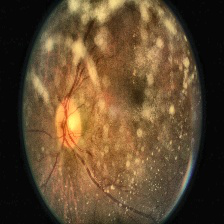

In [ ]:
import PIL
PIL.Image.open(str(list(data_dir.glob('4/*.jpeg'))[0]))

In [ ]:
image_count = len(list(data_dir.glob('3/*.jpeg')))
print(image_count)

203


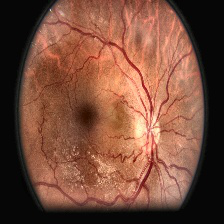

In [ ]:
import PIL
PIL.Image.open(str(list(data_dir.glob('3/*.jpeg'))[0]))

In [ ]:
image_count = len(list(data_dir.glob('2/*.jpeg')))
print(image_count)

1253


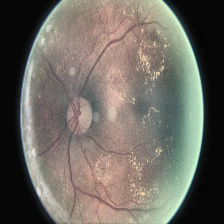

In [ ]:
import PIL
PIL.Image.open(str(list(data_dir.glob('2/*.jpeg'))[0]))

In [ ]:
image_count = len(list(data_dir.glob('1/*.jpeg')))
print(image_count)

542


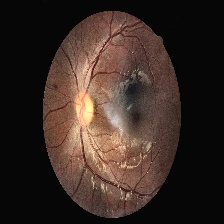

In [ ]:
import PIL
PIL.Image.open(str(list(data_dir.glob('1/*.jpeg'))[0]))

In [ ]:
image_count = len(list(data_dir.glob('0/*.jpeg')))
print(image_count)

6237


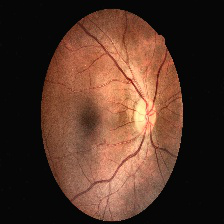

In [ ]:
import PIL
PIL.Image.open(str(list(data_dir.glob('0/*.jpeg'))[0]))